Dimension reduction and state space forecasting, script 2 of the whole program, Chi Zhang

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE

In [28]:
LIBOR_zero = pd.read_excel(r'C:\Users\Richard\Desktop\CurrentTerm\ISYE 8900\CurveFrcst-Using-ManifoldLrn\Data\LIBOR_clean.xlsx', index_col = 0, sheet_name='zero')
#LIBOR_zero

In [29]:
LIBOR_fwd = pd.read_excel(r'C:\Users\Richard\Desktop\CurrentTerm\ISYE 8900\CurveFrcst-Using-ManifoldLrn\Data\LIBOR_clean.xlsx', index_col = 0, sheet_name='forward')

In [30]:
SOFR_zero = pd.read_excel(r'C:\Users\Richard\Desktop\CurrentTerm\ISYE 8900\CurveFrcst-Using-ManifoldLrn\Data\SOFR_clean.xlsx', index_col = 0, sheet_name='zero')
#SOFR_zero

In [31]:
SOFR_fwd = pd.read_excel(r'C:\Users\Richard\Desktop\CurrentTerm\ISYE 8900\CurveFrcst-Using-ManifoldLrn\Data\SOFR_clean.xlsx', index_col = 0, sheet_name='forward')

In [32]:
Treasury_zero = pd.read_excel(r'C:\Users\Richard\Desktop\CurrentTerm\ISYE 8900\CurveFrcst-Using-ManifoldLrn\Data\Treasury_clean.xlsx', index_col = 0, sheet_name='zero')
#Treasury_zero

In [33]:
Treasury_fwd = pd.read_excel(r'C:\Users\Richard\Desktop\CurrentTerm\ISYE 8900\CurveFrcst-Using-ManifoldLrn\Data\Treasury_clean.xlsx', index_col = 0, sheet_name='forward')

In [35]:
OIS_zero = pd.read_excel(r'C:\Users\Richard\Desktop\CurrentTerm\ISYE 8900\CurveFrcst-Using-ManifoldLrn\Data\OIS_clean.xlsx', index_col = 0, sheet_name='zero')

In [36]:
OIS_fwd = pd.read_excel(r'C:\Users\Richard\Desktop\CurrentTerm\ISYE 8900\CurveFrcst-Using-ManifoldLrn\Data\OIS_clean.xlsx', index_col = 0, sheet_name='forward')

## Spread calculation

In [8]:
SwapSpd_zero = LIBOR_zero - Treasury_zero
BasisSpd_zero = LIBOR_zero - SOFR_zero

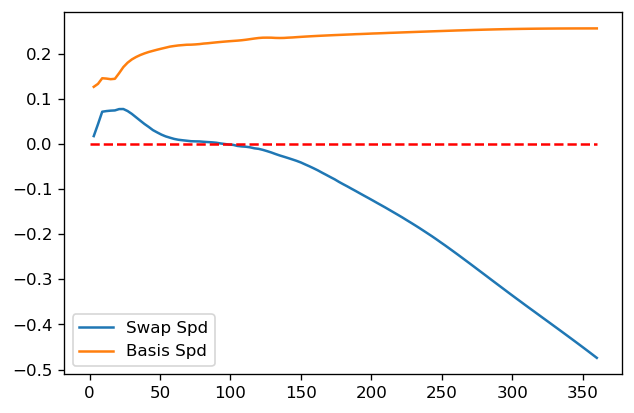

In [9]:
plt.figure(10,dpi=120)
l1, = plt.plot(SwapSpd_zero.columns, SwapSpd_zero.loc['2020-10-30'])
l2, = plt.plot(BasisSpd_zero.columns, BasisSpd_zero.loc['2020-10-30'])
plt.plot([0, 360], [0, 0], c='r', linestyle='--')
plt.legend(handles=[l1,l2], labels = ['Swap Spd','Basis Spd'], loc='best')

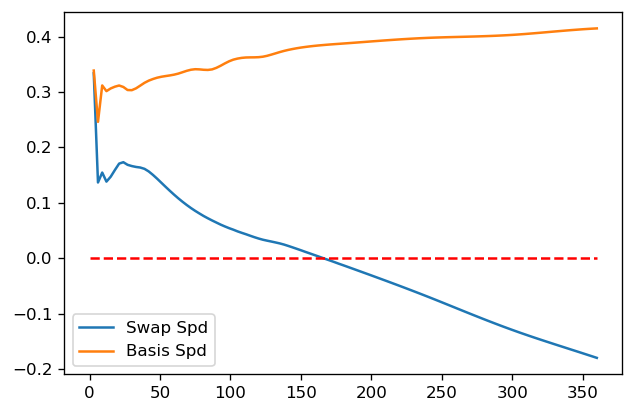

In [10]:
plt.figure(11,dpi=120)
l1, = plt.plot(SwapSpd_zero.columns, SwapSpd_zero.loc['2018-11-02'])
l2, = plt.plot(BasisSpd_zero.columns, BasisSpd_zero.loc['2018-11-02'])
plt.plot([0, 360], [0, 0], c='r', linestyle='--')
plt.legend(handles=[l1,l2], labels = ['Swap Spd','Basis Spd'], loc='best')

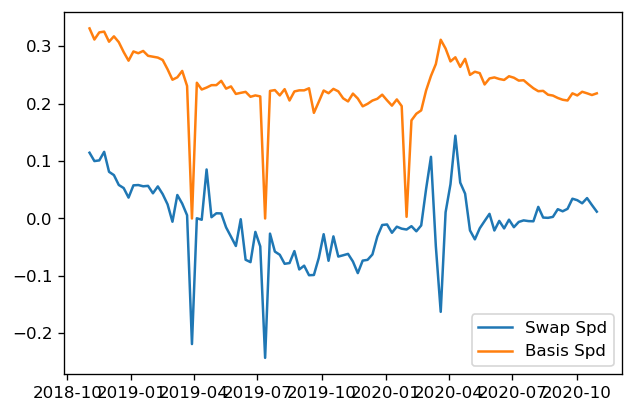

In [11]:
plt.figure(12,dpi=120)
l1, = plt.plot(SwapSpd_zero.index, SwapSpd_zero[60])
l2, = plt.plot(BasisSpd_zero.index, BasisSpd_zero[60])
plt.legend(handles=[l1,l2], labels = ['Swap Spd','Basis Spd'], loc='best')

## DmnsRdct1: PCA

In [12]:
def DmnsRdct1(curve_data):
    # the input could be any term structure of interest, num of samples by num of tenors
    scaler = StandardScaler()
    scaler.fit(curve_data)
    curve_data_scaled = scaler.transform(curve_data)
    
    model1 = PCA(n_components=3, copy=True, whiten=False)
    model1.fit(curve_data_scaled)
    curve_data_low = pd.DataFrame(model1.transform(curve_data_scaled))
    curve_data_low.index = curve_data.index
    
    for i, pc in enumerate(model1.explained_variance_ratio_):
        print('{0}.\t{1:2.2f}%'.format(i+1,pc*100.0))
        
    fig = plt.figure(figsize=(8,6))
    plt.title('First {0} PCA components'.format(np.shape(np.transpose(model1.components_))[1]))
    l1, = plt.plot(curve_data.columns, np.transpose(model1.components_)[:,0])
    l2, = plt.plot(curve_data.columns, np.transpose(model1.components_)[:,1])
    l3, = plt.plot(curve_data.columns, np.transpose(model1.components_)[:,2])
    plt.legend(handles=[l1,l2,l3], labels = ['1 pc','2 pc','3 pc'], loc='best')
    
    fig = plt.figure(figsize=(8,6))
    plt.title('Projection on {0}. and {1}. PC'.format(0+1,1+1))
    plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
    plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

    sc = plt.scatter(curve_data_low.loc[:,0],curve_data_low.loc[:,1], c=[d.year + d.month/12 for d in curve_data_low.index], cmap='rainbow')
    cb = plt.colorbar(sc)
    
    fig = plt.figure(figsize=(8,6))
    plt.title('Projection on {0}. and {1}. PC'.format(0+1,2+1))
    plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
    plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

    sc = plt.scatter(curve_data_low.loc[:,0],curve_data_low.loc[:,2], c=[d.year + d.month/12 for d in curve_data_low.index], cmap='rainbow')
    cb = plt.colorbar(sc)
    
    fig = plt.figure(figsize=(8,6))
    plt.title('Projection on {0}. and {1}. PC'.format(1+1,2+1))
    plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
    plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

    sc = plt.scatter(curve_data_low.loc[:,1],curve_data_low.loc[:,2], c=[d.year + d.month/12 for d in curve_data_low.index], cmap='rainbow')
    cb = plt.colorbar(sc)
    
    return curve_data_low

1.	99.32%
2.	0.51%
3.	0.14%


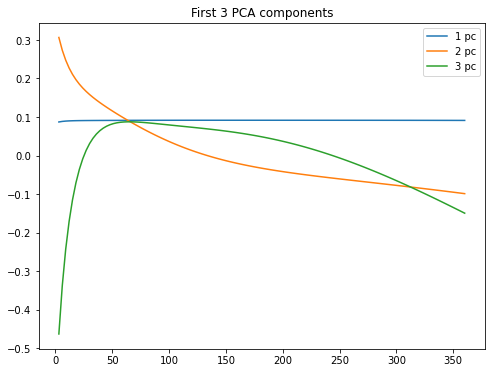

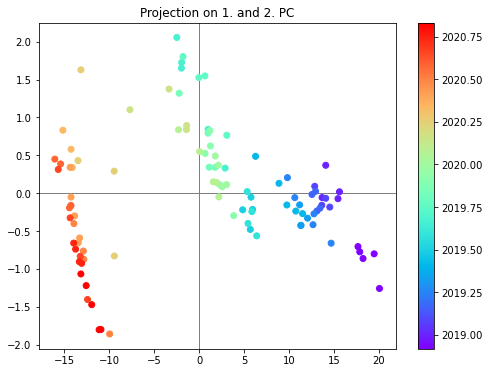

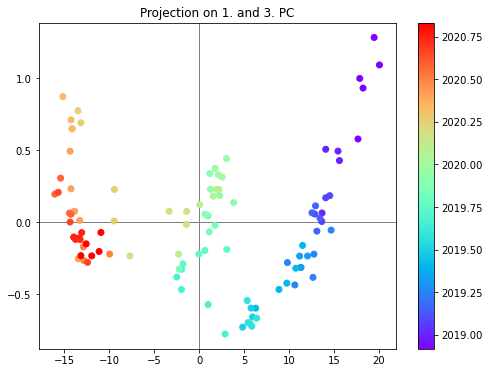

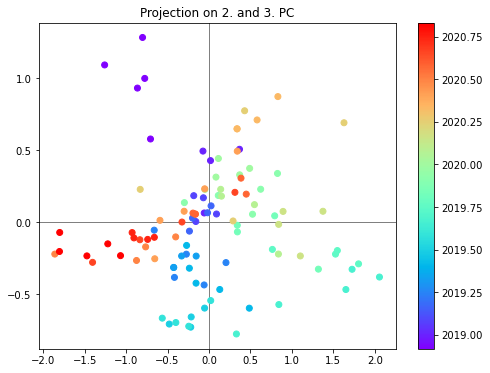

In [13]:
Treasury_zero_low = DmnsRdct1(Treasury_zero)
# show proportion of explained variance by leading PCs and loadings

The first two graphs with 1st pc is more informative: in recent dates (late 2020), the level is lower than then the early period (late 2018).
For the second pc (whose loading is downward sloping), a positive value (late 2019 and early 2020) means the original curve is downward sloping at that time.On the other hand, a negative value (late 2020) and (early 2019) indicates the curve is upward sloping then.

1.	99.10%
2.	0.76%
3.	0.12%


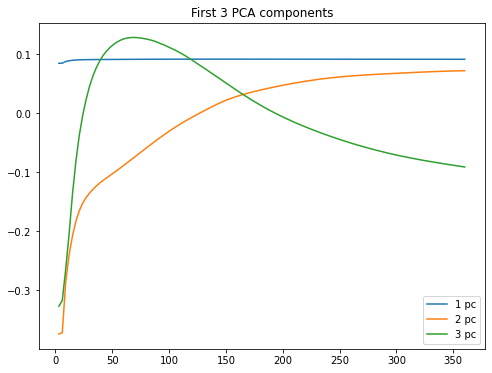

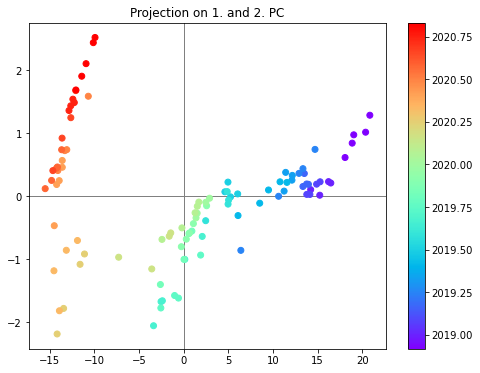

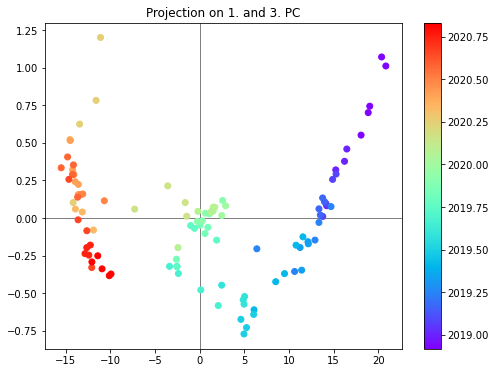

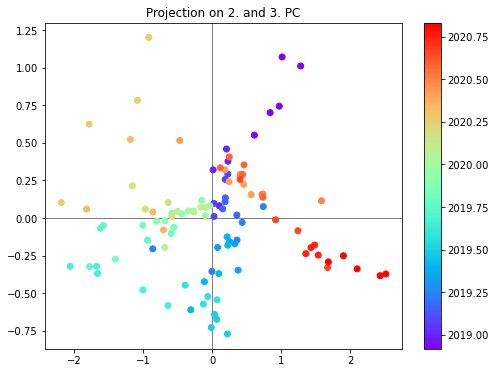

In [17]:
LIBOR_zero_low = DmnsRdct1(LIBOR_zero)
# same procedure for the LIBOR zero curve

For the second pc of LIBOR (whose loading is upward sloping), a negative value (late 2019 and early 2020) means the original curve is downward sloping at that time.On the other hand, a positive value (late 2020) and (early 2019) indicates the curve is upward sloping then.

1.	99.20%
2.	0.56%
3.	0.20%


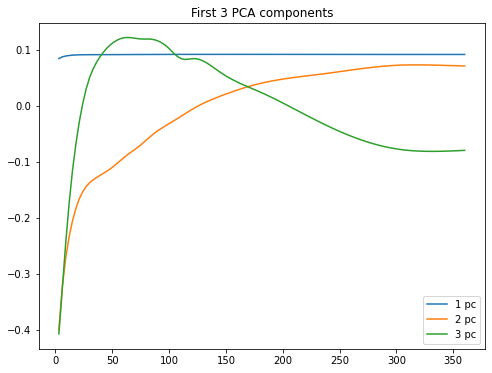

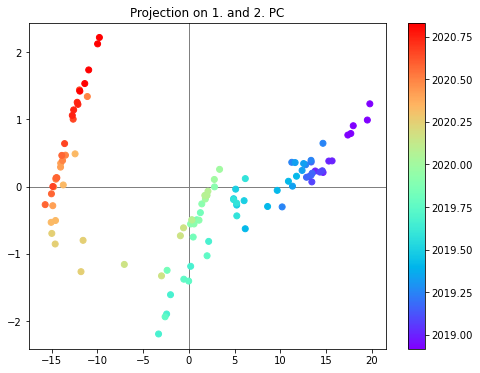

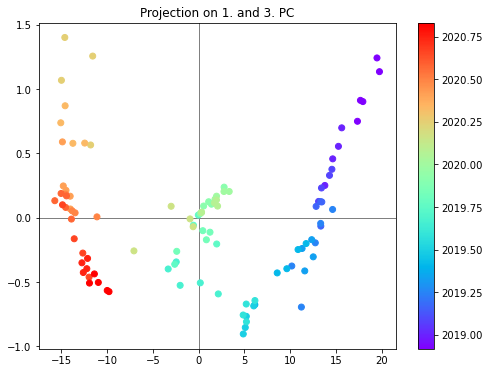

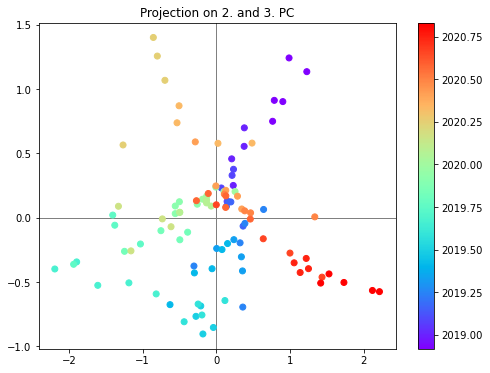

In [18]:
SOFR_zero_low = DmnsRdct1(SOFR_zero)
# same procedure for the SOFR zero curve

1.	79.55%
2.	13.18%
3.	5.34%


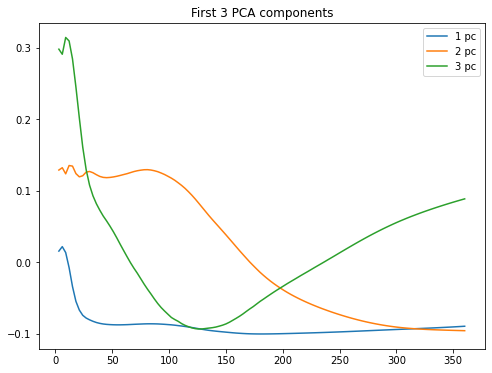

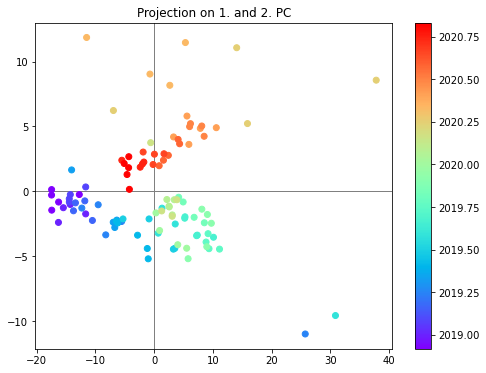

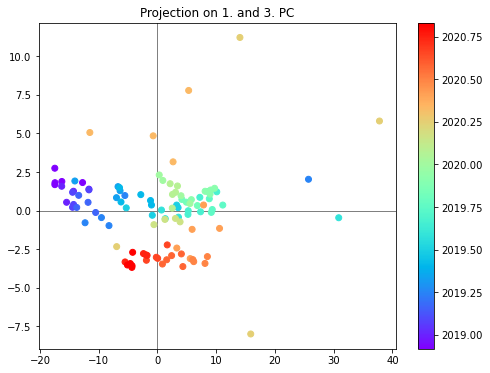

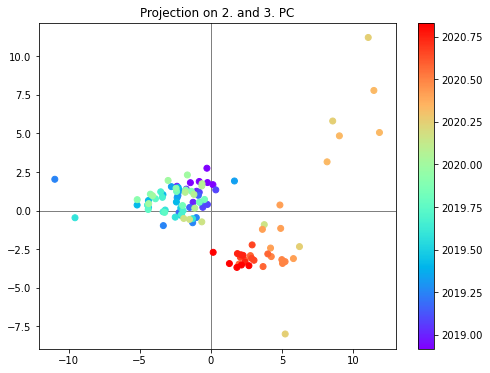

In [19]:
SwapSpd_zero_low = DmnsRdct1(SwapSpd_zero)

As shown in the previous 2 figures, the 1pc is centered around zero value. The data cluster performance is frustrating in terms of inter-cluster distance. Hence, we still prefer model the term structure of each interest rate, then calculate the spread after the time series forcast step.

1.	87.94%
2.	7.95%
3.	1.81%


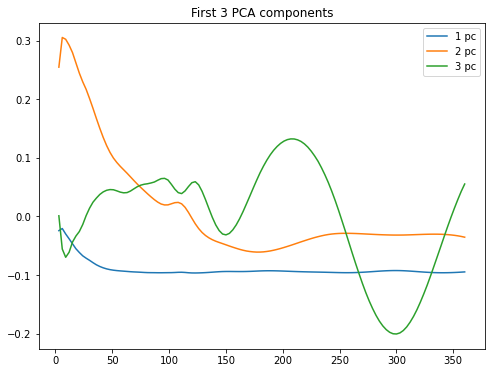

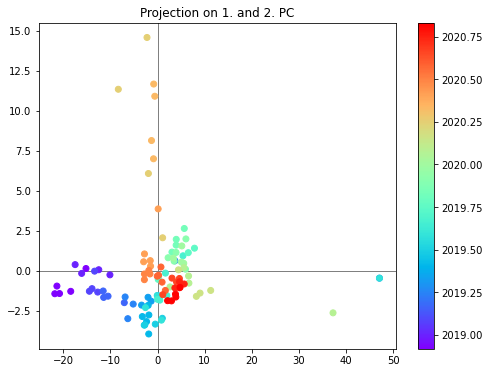

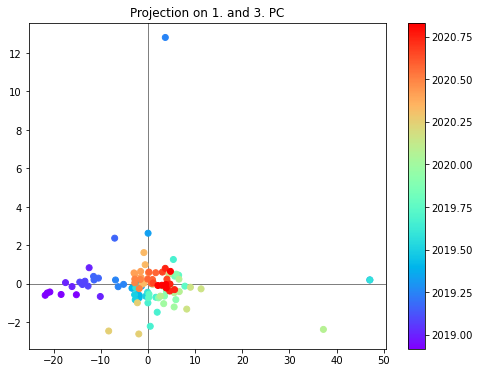

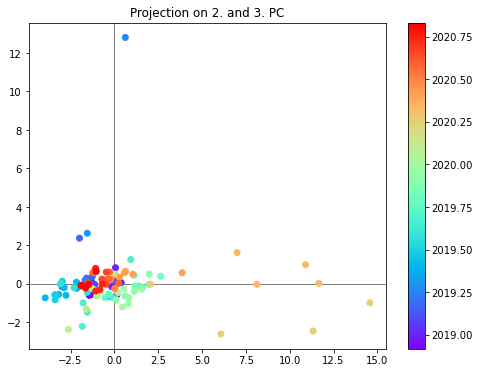

In [20]:
BasisSpd_zero_low = DmnsRdct1(BasisSpd_zero)

1.	79.55%
2.	13.18%
3.	5.34%


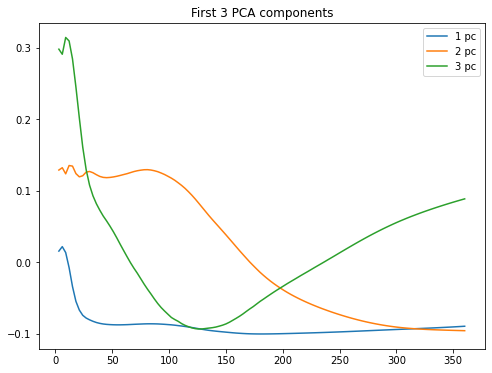

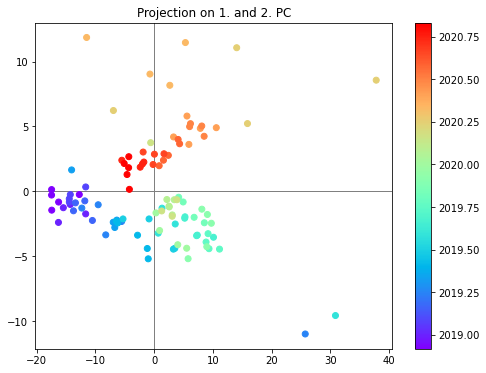

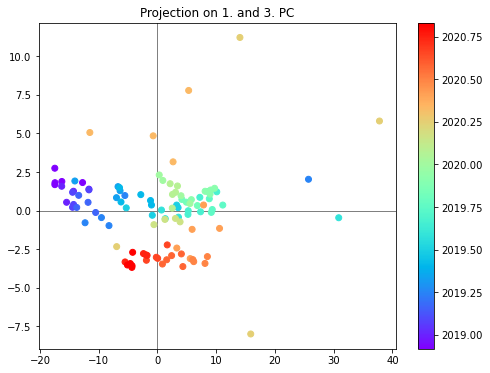

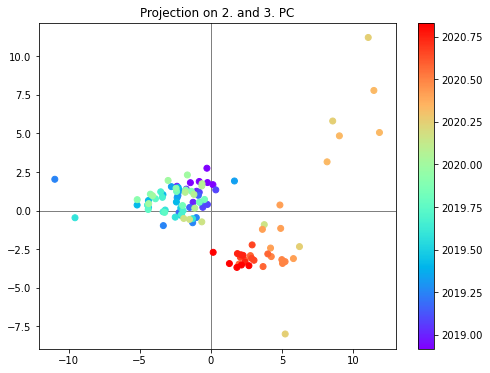

In [21]:
SwapSpd_zero_low = DmnsRdct1(SwapSpd_zero)

## DmnsRdct2: MDS

In [22]:
scaler = StandardScaler()
scaler.fit(Treasury_zero)
Treasury_zero_scaled = scaler.transform(Treasury_zero)

In [23]:
model2 = MDS(n_components=3, dissimilarity='euclidean')
Treasury_zero_low = pd.DataFrame(model2.fit_transform(Treasury_zero_scaled))
Treasury_zero_low.index = Treasury_zero.index

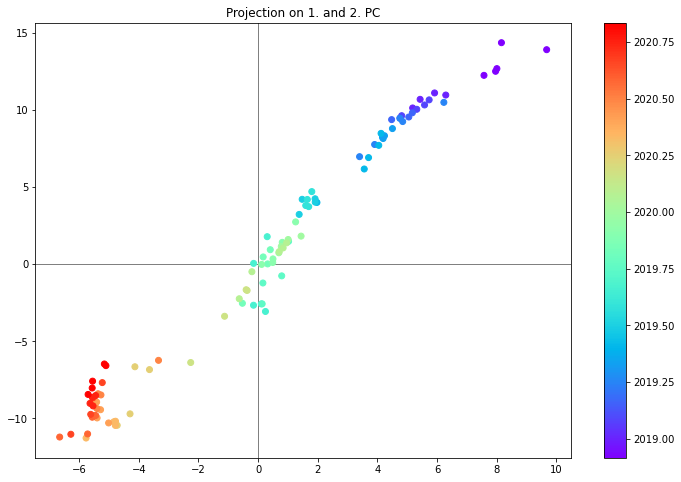

In [24]:
pc1 = 0
pc2 = 1
fig = plt.figure(figsize=(12,8))
plt.title('Projection on {0}. and {1}. PC'.format(pc1+1,pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

sc = plt.scatter(Treasury_zero_low.loc[:,pc1],Treasury_zero_low.loc[:,pc2], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
cb = plt.colorbar(sc)

As shown in the fig above, the first two PC from MDS are linear correlated. The temporal evolution is pretty observable.

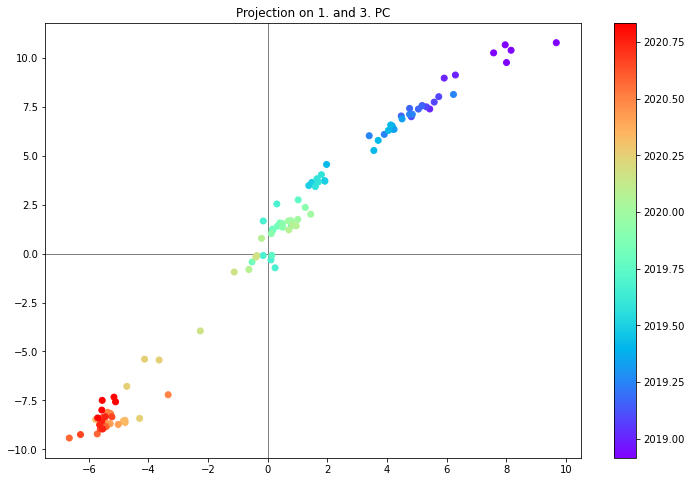

In [25]:
pc1 = 0
pc2 = 2
fig = plt.figure(figsize=(12,8))
plt.title('Projection on {0}. and {1}. PC'.format(pc1+1,pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

sc = plt.scatter(Treasury_zero_low.loc[:,pc1],Treasury_zero_low.loc[:,pc2], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
cb = plt.colorbar(sc)

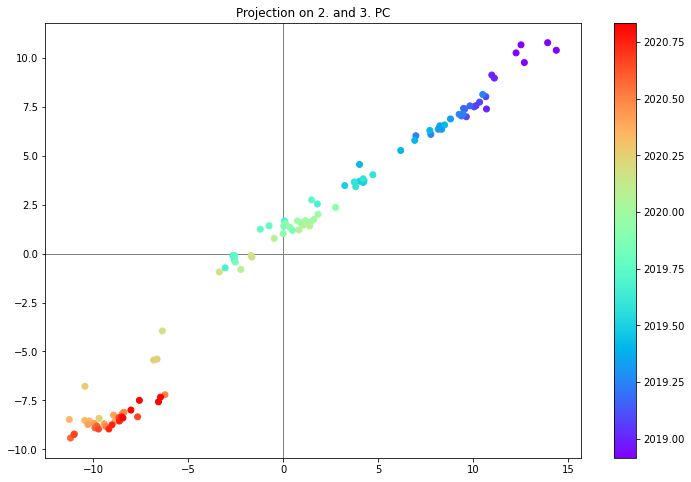

In [26]:
pc1 = 1
pc2 = 2
fig = plt.figure(figsize=(12,8))
plt.title('Projection on {0}. and {1}. PC'.format(pc1+1,pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

sc = plt.scatter(Treasury_zero_low.loc[:,pc1],Treasury_zero_low.loc[:,pc2], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
cb = plt.colorbar(sc)

All of the three low-dim representations demonstrate pairwise correlation. Need more time to think through the cause for this phenomenon.

## DmnsRdct3: LLE

In [27]:
model3 = LocallyLinearEmbedding(n_components=3, n_neighbors = 10)
Treasury_zero_low = pd.DataFrame(model3.fit_transform(Treasury_zero_scaled))
Treasury_zero_low.index = Treasury_zero.index

In [28]:
Treasury_zero_low

,0,1,2
2018-11-02,-0.104423,-0.232054,0.024762
2018-11-09,-0.102918,-0.222204,0.023628
2018-11-16,-0.099487,-0.199295,0.020161
2018-11-23,-0.098558,-0.193151,0.019340
2018-11-30,-0.097744,-0.187668,0.018422
...,...,...,...
2020-10-02,0.128130,-0.008466,0.150052
2020-10-09,0.107308,0.016492,0.223350
2020-10-16,0.118510,0.002919,0.172629
2020-10-23,0.093097,0.033610,0.279889


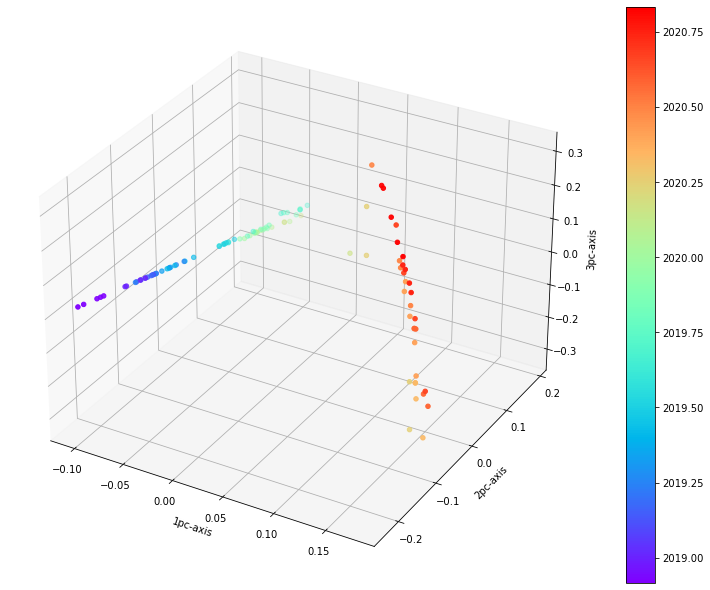

In [31]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)

sc = ax.scatter(Treasury_zero_low.loc[:,0],Treasury_zero_low.loc[:,1], Treasury_zero_low.loc[:,2], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
ax.set_xlabel('1pc-axis')
ax.set_ylabel('2pc-axis')
ax.set_zlabel('3pc-axis')
cb = plt.colorbar(sc)

## DmnsRdct4: t-SNE

In [45]:
model4 = TSNE(n_components=3, init = 'pca', perplexity=15)
Treasury_zero_low = pd.DataFrame(model4.fit_transform(Treasury_zero_scaled))
Treasury_zero_low.index = Treasury_zero.index

In [46]:
Treasury_zero_low

,0,1,2
2018-11-02,86.185661,66.782928,53.942513
2018-11-09,81.128120,88.170303,6.574101
2018-11-16,99.769188,84.507675,31.981743
2018-11-23,66.016151,67.926323,26.660673
2018-11-30,94.396416,57.221897,15.317951
...,...,...,...
2020-10-02,-96.325043,2.292442,91.538826
2020-10-09,-70.632698,38.727669,52.732418
2020-10-16,-90.913696,39.205994,83.532585
2020-10-23,-43.476467,50.678257,69.544411


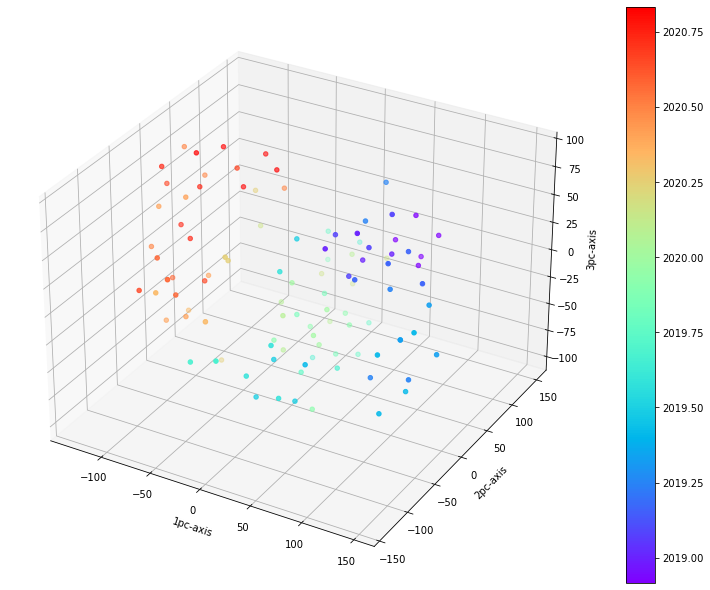

In [47]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)

sc = ax.scatter(Treasury_zero_low.loc[:,0],Treasury_zero_low.loc[:,1], Treasury_zero_low.loc[:,2], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
ax.set_xlabel('1pc-axis')
ax.set_ylabel('2pc-axis')
ax.set_zlabel('3pc-axis')
cb = plt.colorbar(sc)

## Time Series Forecasting in low-D

In [9]:
import statsmodels.tsa.arima_model as sml
import Kalman_filter as KF

In [10]:
import warnings
warnings.filterwarnings('ignore')

### AR - Treasury Zero

entire dataset

mu = -13.5582
beta = 0.9782
alpha = -0.2956


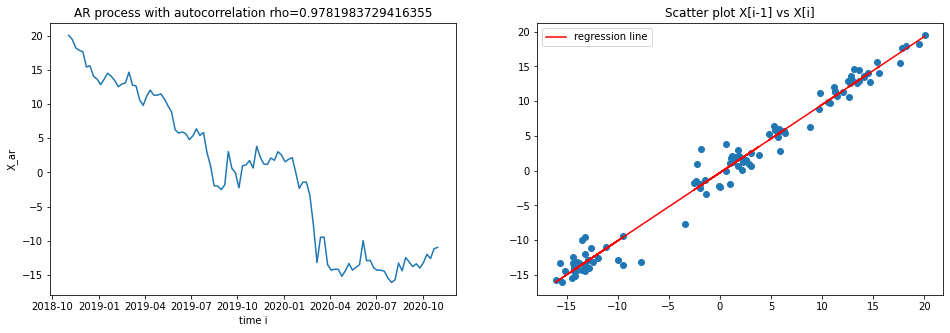

mu = -0.0124
beta = 0.8246
alpha = -0.0022


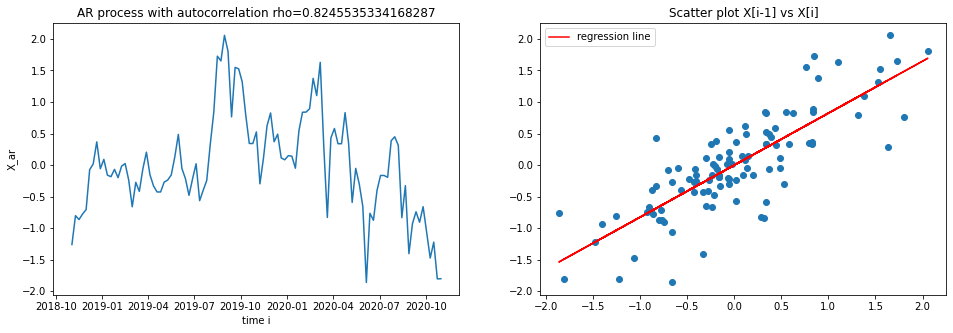

mu = -0.0737
beta = 0.8496
alpha = -0.0111


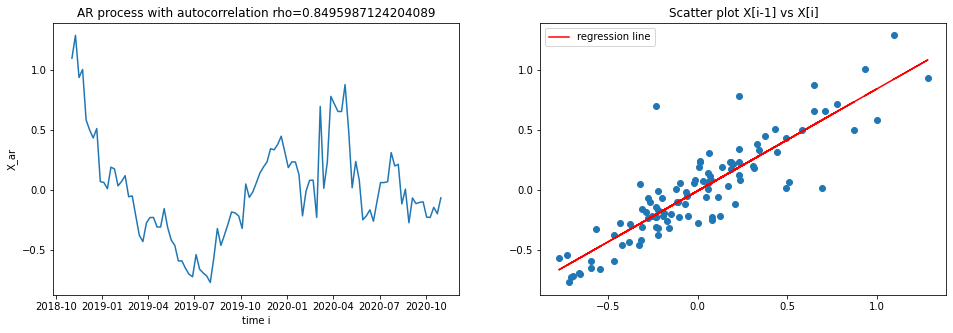

In [14]:
for col in Treasury_zero_low.columns:
    AR1 = sml.ARMA( Treasury_zero_low[col], (1,0) ).fit(disp=0, method='css')
    print("mu = %.4f" % AR1.params[0])
    print("beta = %.4f" % AR1.params[1])
    alpha = AR1.params[0] * (1-AR1.params[1])
    print("alpha = %.4f" % float(alpha))
    
    fig = plt.figure(figsize=(16,5))
    ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)

    ax1.plot(Treasury_zero_low[col]); ax1.set_xlabel("time i"); ax1.set_ylabel("X_ar")
    ax1.set_title("AR process with autocorrelation rho={}".format(AR1.params[1]))
    ax2.scatter(Treasury_zero_low[col][:-1], Treasury_zero_low[col][1:]); ax2.set_title("Scatter plot X[i-1] vs X[i]") 
    ax2.plot(Treasury_zero_low[col][:-1], alpha + AR1.params[1]*Treasury_zero_low[col][:-1], color="r", label="regression line"); ax2.legend()
    plt.show()

Train and Test sets

In [15]:
training_size = 80
set_var_eps = []

for col in Treasury_zero_low.columns:
    AR1 = sml.ARMA( Treasury_zero_low[col][:training_size], (1,0) ).fit(disp=0, method='css')
    alpha = AR1.params[0] * (1-AR1.params[1])
    resid = AR1.resid
    var_eps_ols = resid.var(ddof=2)    # a possible initial guess for var_eps
    set_var_eps.append(var_eps_ols)
    
    print("var_eps = %.4f" % var_eps_ols)
    print("beta = %.4f" % AR1.params[1])
    print("alpha = %.4f\n" % float(alpha))

var_eps = 2.7018
beta = 0.9877
alpha = -0.3679

var_eps = 0.1760
beta = 0.7705
alpha = 0.0608

var_eps = 0.0426
beta = 0.8612
alpha = -0.0111



In [16]:
set_var_eps

[2.7018011188816233, 0.1760478888624647, 0.04262245281586083]

### Kalman filter

Window-dependent estimation

In [17]:
rolling_window = 60
set_var_eta = []

for col in Treasury_zero_low.columns:
    set_train_beta = []
    
    for i in range( rolling_window, training_size):
        AR1 = sml.ARMA( Treasury_zero_low[col][i-rolling_window:i+1], (1,0) ).fit(disp=0, method='css')
        set_train_beta.append(AR1.params[1])
    
    set_var_eta.append( np.std(np.diff(set_train_beta)) ** 2)

In [18]:
set_var_eta

[0.00010093968935075345, 0.0003439688603344009, 0.000796098383827286]

Kalman filter application

beta_last =  0.9824383814686607 P_last =  0.0015178553219682212


beta_last =  0.7051490740796899 P_last =  0.010308875743207376


beta_last =  0.7660749618376843 P_last =  0.010448854197209477




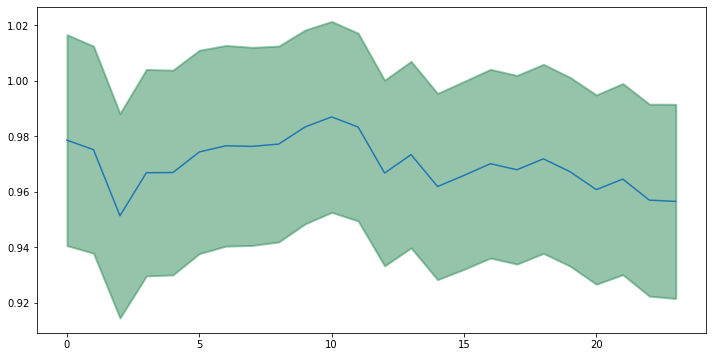

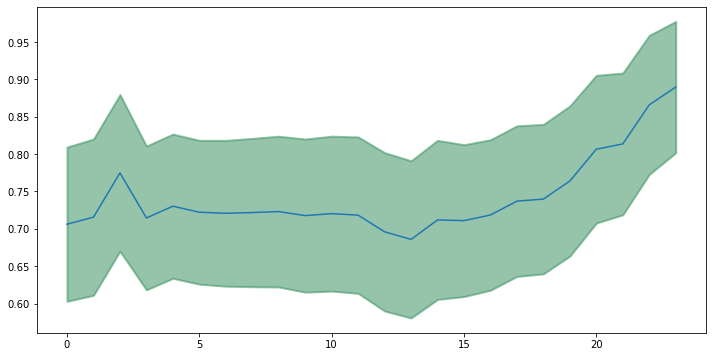

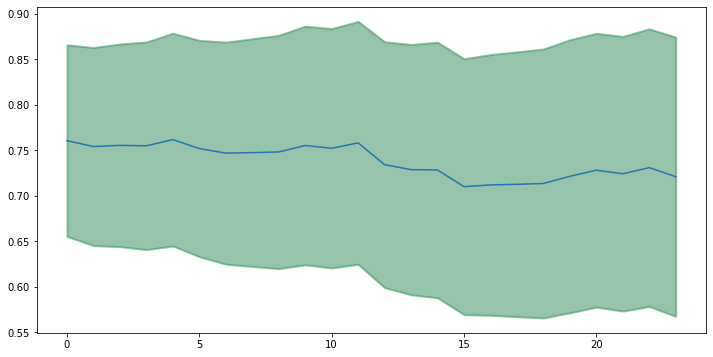

In [19]:
# obtain noise params using OLS
for col in Treasury_zero_low.columns:
    # Training:
    # init a KF instantiate
    KR = KF.Kalman_regression(Treasury_zero_low[col][:training_size-1], Treasury_zero_low[col][1:training_size])
    # set noise params
    KR.var_eps = set_var_eps[col]
    KR.var_eta = set_var_eta[col]
    # run the exact Kalman Algo
    KR.run()
    print("beta_last = ", KR.betas[-1], "P_last = ", KR.Ps[-1])
    
    # Testing:
    # set the last beta and process covariance in train set as the init value of test set
    KR.beta0 = KR.betas[-1]
    KR.P0 = KR.Ps[-1]
    # run on test set
    KR.run(Treasury_zero_low[col][training_size:-1], Treasury_zero_low[col][training_size+1:])
    # plot KF beta and 1 std band
    plt.figure(figsize=(12,6))
    plt.plot(KR.betas, label="Kalman filter betas")
    plt.fill_between(x=range(len(KR.betas)) ,y1=KR.betas + np.sqrt(KR.Ps), y2=KR.betas - np.sqrt(KR.Ps), 
                 alpha=0.5, linewidth=2, color='seagreen', label="Kalman error: $\pm 1 \sigma$ ")
    
    print('\n')

beta_last =  0.9877355608903364 P_last =  0.0001713305531796258


beta_last =  0.5986608926454904 P_last =  0.021769216318555277


beta_last =  0.818866350473602 P_last =  0.004852023950455317




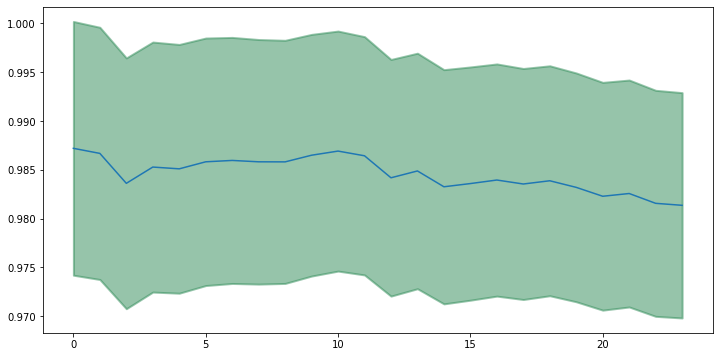

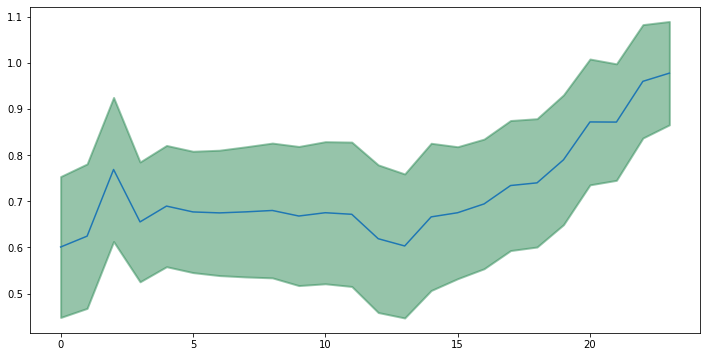

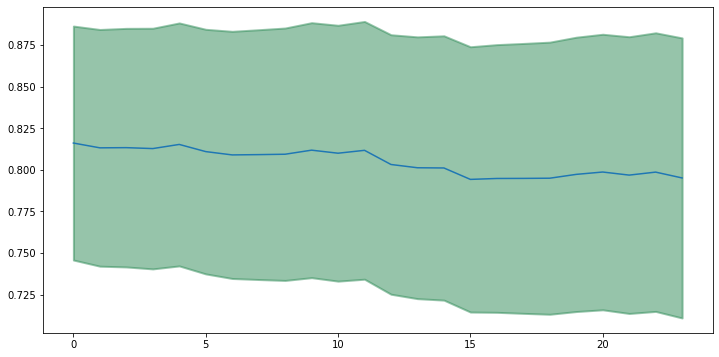

In [20]:
# obtain noise params using MLE
for col in Treasury_zero_low.columns:
    # Training:
    # init a KF instantiate
    KR = KF.Kalman_regression(Treasury_zero_low[col][:training_size-1], Treasury_zero_low[col][1:training_size])
    # calibrate the noise params using MLE
    KR.calibrate_MLE() # var_eps is the measurement noise, var_eta is the process noise
    # run the exact Kalman Algo
    KR.run()
    print("beta_last = ", KR.betas[-1], "P_last = ", KR.Ps[-1])
    
    # Testing:
    # set the last beta and process covariance in train set as the init value of test set
    KR.beta0 = KR.betas[-1]
    KR.P0 = KR.Ps[-1]
    # run on test set
    KR.run(Treasury_zero_low[col][training_size:-1], Treasury_zero_low[col][training_size+1:])
    # plot KF beta and 1 std band
    plt.figure(figsize=(12,6))
    plt.plot(KR.betas, label="Kalman filter betas")
    plt.fill_between(x=range(len(KR.betas)) ,y1=KR.betas + np.sqrt(KR.Ps), y2=KR.betas - np.sqrt(KR.Ps), 
                 alpha=0.5, linewidth=2, color='seagreen', label="Kalman error: $\pm 1 \sigma$ ")

    
    print('\n')

## Reconstruction to high-D and real-time backtesting

### use PCA for different term structures

In [25]:
def Backtesting_PCA(curve_data, rolling_window=60):
    accry = {24:0,60:0,120:0,240:0,360:0}

    for i in range( rolling_window, curve_data.shape[0]-1):
    
        train_data = curve_data[i-rolling_window:i+1]
        test_data = curve_data[i+1:i+2]
    
        scaler = StandardScaler()
        scaler.fit(train_data)
        train_data_scaled = scaler.transform(train_data)
    
        model1 = PCA(n_components=3, copy=True, whiten=False)
        model1.fit(train_data_scaled)
        train_data_low = pd.DataFrame(model1.transform(train_data_scaled))
        train_data_low.index = train_data.index
    
    
        pred_lst = []
        for col in train_data_low.columns:
            # Training:
            # init a KF instantiate
            KR = KF.Kalman_regression(train_data_low[col][:-1], train_data_low[col][1:])
            # calibrate the noise params using MLE
            KR.calibrate_MLE()
        
            # run the exact Kalman Algo
            KR.run()
    
            KR.beta0 = KR.betas[-1]
            KR.P0 = KR.Ps[-1]
    
            # Predict:
            pred = KR.beta0 * train_data_low[col][-1] + KR.alpha0
            pred_lst.append(pred)
    
    
        pred_ary = np.array(pred_lst).reshape(1,-1)
        pred_data = model1.inverse_transform(pred_ary)
        pred_data = scaler.inverse_transform(pred_data)
    
        
#         plt.figure(dpi=120)
#         l1, = plt.plot(test_data.columns, pred_data.squeeze())
#         l2, = plt.plot(test_data.columns, test_data.squeeze())
#         plt.plot([0, 360], [0, 0], c='r', linestyle='--')
#         plt.legend(handles=[l1,l2], labels = ['pred','test'], loc='best')

        # evaluate
        for m in [24,60,120,240,360]:
            if (test_data[m].values-train_data[-1:][m].values) * (pred_data[0,int(m/3)-1]-train_data[-1:][m].values) >= 0:
                accry[m] += 1
                
    
    accry = {key: round(value / (curve_data.shape[0]-1 - rolling_window),3) for key, value in accry.items()}
    return accry
        



In [26]:
res_Treasury_zero = Backtesting_PCA(Treasury_zero, rolling_window=60)

In [16]:
res_Treasury_zero

{24: 0.455, 60: 0.545, 120: 0.432, 240: 0.455, 360: 0.523}

In [17]:
res_LIBOR_zero = Backtesting_PCA(LIBOR_zero, rolling_window=60)

In [18]:
res_LIBOR_zero

{24: 0.545, 60: 0.455, 120: 0.477, 240: 0.477, 360: 0.477}

In [19]:
res_SOFR_zero = Backtesting_PCA(SOFR_zero, rolling_window=60)

In [20]:
res_SOFR_zero

{24: 0.682, 60: 0.455, 120: 0.5, 240: 0.5, 360: 0.5}

In [21]:
res_SwapSpd_zero = Backtesting_PCA(SwapSpd_zero, rolling_window=60)

In [22]:
res_SwapSpd_zero

{24: 0.545, 60: 0.523, 120: 0.545, 240: 0.477, 360: 0.568}

In [23]:
res_BasisSpd_zero = Backtesting_PCA(BasisSpd_zero, rolling_window=60)

In [24]:
res_BasisSpd_zero

{24: 0.455, 60: 0.523, 120: 0.568, 240: 0.545, 360: 0.636}

### use LLE for different term structures

LLE reconstruction method according to the work by Jin Chen, Shijie Deng, and Xiaoming Huo (2004）. Because the (inverse) manifold learning algo is not a injective function for nonlinear DR (at least for MDS), we may cannot come up with a general approach. Two potential solutions: (1) nonparametric regression to fit the mapping from low-d to high-d; (2) inverse manifold learning by the scholars in Xihu University (2020).

### use MDS for different term structures

### use t-SNE for different term structures